# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

*Table of contents*<a id='toc0_'></a>
- [ Building a Predictive Model for BigMart's 2013 Sales Data](#toc1_1)
- [Introduction](##toc2)
- [Problem Statement](#toc3)
- [Data Understanding](#toc5_)
- [Loading Packages and Data](#toc7_)
- [Reading Datasets](#toc8_)
- [Data Overview](#toc9_)
- [Explanatory Data Analysis](#toc10)
  - [Univariate Analysis](#toc10_1)
  - [Bivariate Analysis](#toc10_2)
  - [Multivariate Analysis](#toc10_3)
- [Data Cleaning](#toc11_)
  - [Handling Missing Values](#toc11_1)
  - [Encoding Categorical Data](#toc11_2)
- [ML Algorithms](#toc12_)
  - [Simple Linear Regression](#toc12_1)
  - [Random Forest](#toc12_4)
  - [XGBoost](#toc12_5)
-


## <a id='toc2_'></a>[Introduction](#toc0_)
In the dynamic landscape of retail, accurate sales predictions play a pivotal role in optimizing inventory management, ensuring customer satisfaction, and maximizing profitability. BigMart, a prominent retail chain, has amassed extensive sales data from **2013**, covering **1559 unique products** distributed across **10 stores** situated in diverse cities. This dataset encapsulates crucial attributes of each product and store, offering a rich source for predictive modeling and actionable insights.

## <a id='toc3_'></a>[Business Understanding](#toc0_)

### <a id='toc3_1_'></a>[Problem Statement](#toc0_)
**Problem Description:**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### <a id='toc3_2_'></a>[Challenges & Considerations](#toc0_)

One notable challenge in the dataset is the presence of missing values, attributed to technical glitches that led to incomplete reporting from certain stores. Addressing these missing values is imperative to ensure the reliability and accuracy of the predictive model. The structured approach outlined in the project plan involves hypothesis generation, exploratory data analysis, handling missing values, feature engineering, and model building using diverse techniques like linear regression, regularized linear regression, RandomForest, and XGBoost.

### <a id='toc3_3_'></a>[Project Significance](#toc0_)

MartForecast: Navigating Retail Success with Predictive Analytics

Successfully building and deploying an accurate predictive model not only aids BigMart in optimizing inventory and boosting sales but also provides a framework for future decision-making. Understanding the key drivers of sales can guide product placement, promotional strategies, and inventory stocking levels, leading to improved operational efficiency and customer satisfaction.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("Train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test = pd.read_csv("Test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


 ## <a id='toc2_'></a>[Data Structure and Content](#toc0_)

In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.shape

(5681, 11)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**checking unique values of train data**

In [10]:
df_train["Item_Fat_Content"].unique()           

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df_train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
df_train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
df_train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [14]:
df_train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

**checking unique values of a test dataset**

In [15]:
df_test["Item_Fat_Content"].unique() 

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [16]:
df_test["Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [17]:
df_test["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [18]:
df_test["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [19]:
df_test["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [20]:
#combine the dataset
df_train['source'] = 'train' 
df_test['source'] = 'test' 
df_test['Item_Outlet_Sales']=0.0  
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [21]:
# Save the combined dataframe to a CSV file 
combined_df.to_csv('combined_df.csv', index=False)

**Dataset Overview:**

**Rows and Columns:** The dataset consists of 14,204 entries across 13 columns.

**Key Features:**

- **Item_Identifier:** Unique product.
- **Item_Fat_Content:** Indicates the fat content of the product.
- **Item_Visibility:** Visibility of the product in the store.
- **Item_Type:** Category/type of the product.
- **Item_MRP:** Maximum Retail Price of the product.
- **Outlet_Identifier:** Unique identifier for each store.
- **Outlet_Establishment_Year:** Year of establishment for each store.
- **Outlet_Size:** Size of the store (10188 non-null values).
- **Outlet_Location_Type:** Type of city where the store is located.
- **Outlet_Type:** Type of outlet (e.g., supermarket, grocery store).
- **Item_Outlet_Sales:** Sales of the product in the store (8523 non-null values).
- **source:** Indicates whether the data point is from the train or test dataset.

## <a id='toc2_'></a>[Exploratory Data Analysis](#toc0_)

**univariate analaysis**

>**numeric columns**

In [22]:
num_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

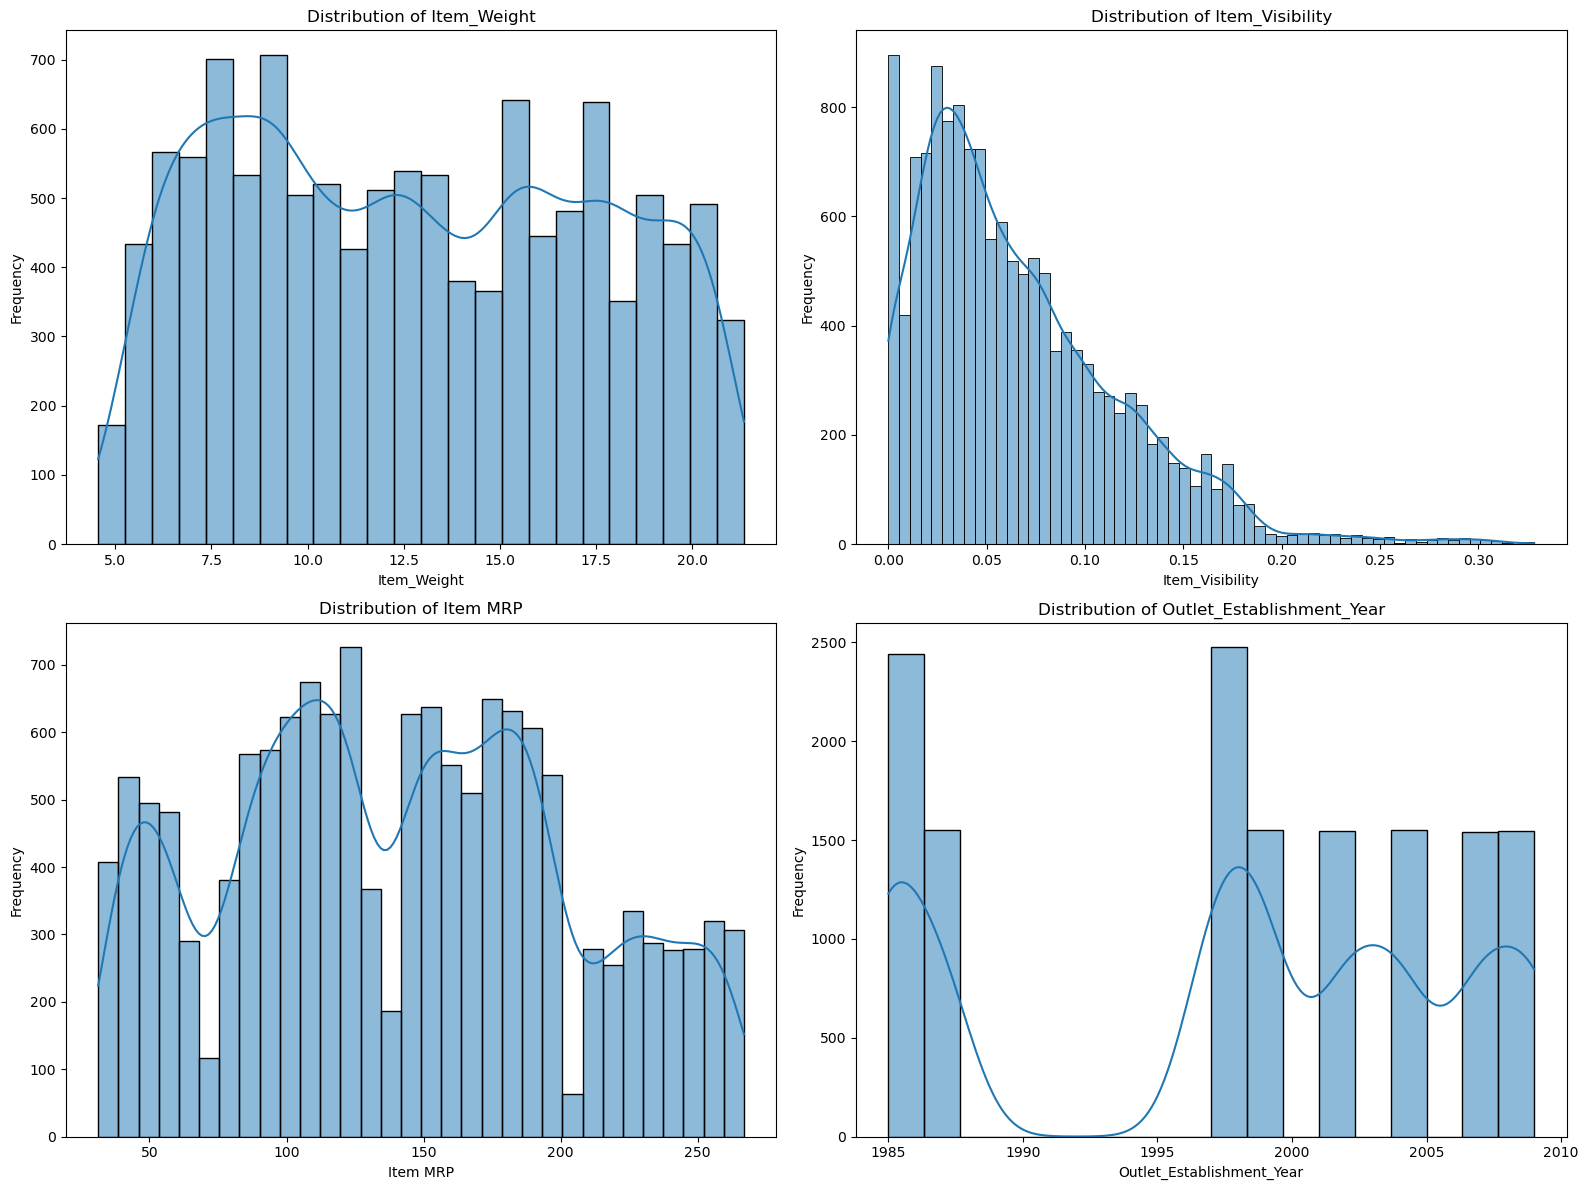

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Display distribution of Item MRP
sns.histplot(combined_df['Item_Weight'], kde=True , ax= axes[0,0])
axes[0,0].set_title('Distribution of Item_Weight')
axes[0,0].set_xlabel('Item_Weight')
axes[0,0].set_ylabel('Frequency')

sns.histplot(combined_df['Item_Visibility'], kde=True , ax= axes[0,1])
axes[0,1].set_title('Distribution of Item_Visibility')
axes[0,1].set_xlabel('Item_Visibility')
axes[0,1].set_ylabel('Frequency')

sns.histplot(combined_df['Item_MRP'], kde=True , ax= axes[1,0])
axes[1,0].set_title('Distribution of Item MRP')
axes[1,0].set_xlabel('Item MRP')
axes[1,0].set_ylabel('Frequency')

sns.histplot(combined_df['Outlet_Establishment_Year'], kde=True , ax= axes[1,1])
axes[1,1].set_title('Distribution of Outlet_Establishment_Year')
axes[1,1].set_xlabel('Outlet_Establishment_Year')
axes[1,1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

>**categorical columns**

In [24]:
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size']
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Size']

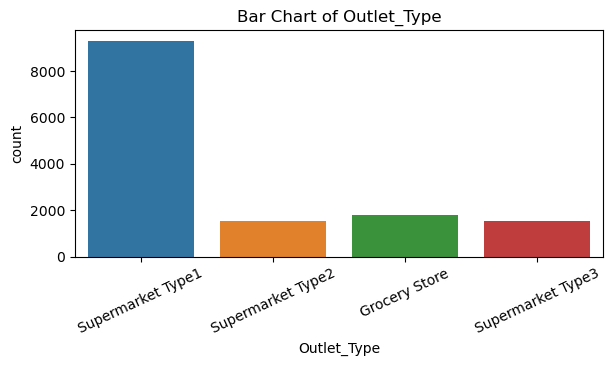

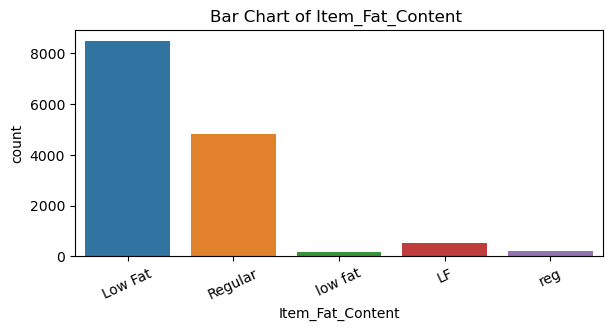

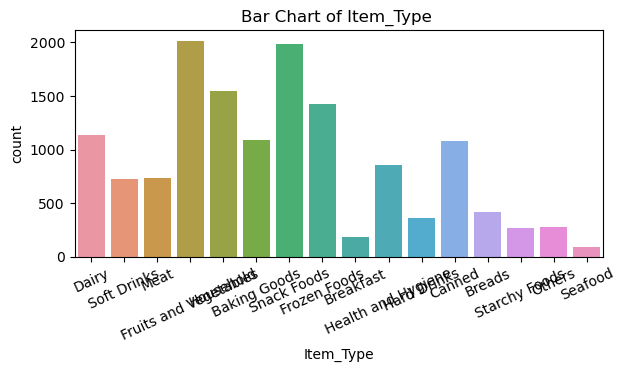

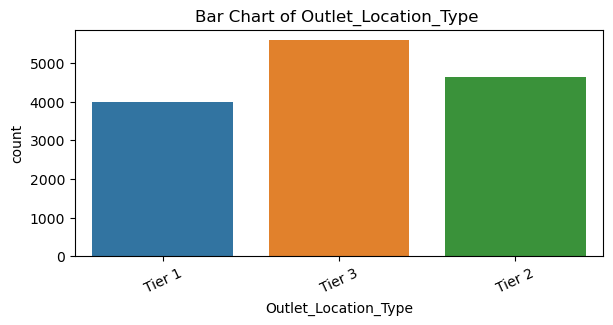

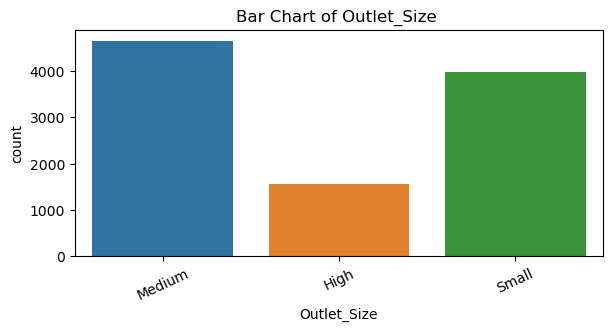

In [25]:
# Bar plot 
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(x='Outlet_Type', data=combined_df)
plt.title('Bar Chart of Outlet_Type')
plt.xticks(rotation=25)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,2,2)
sns.countplot(x='Item_Fat_Content', data=combined_df)
plt.title('Bar Chart of Item_Fat_Content ')
plt.xticks(rotation=25)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,2,3)
sns.countplot(x='Item_Type', data=combined_df)
plt.title('Bar Chart of Item_Type ')
plt.xticks(rotation=25)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,2,4)
sns.countplot(x='Outlet_Location_Type', data=combined_df)
plt.title('Bar Chart of Outlet_Location_Type ')
plt.xticks(rotation=25)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,2,5)
sns.countplot(x='Outlet_Size', data=combined_df)
plt.title('Bar Chart of Outlet_Size ')
plt.xticks(rotation=25)
plt.show()

**bivariate analysis**

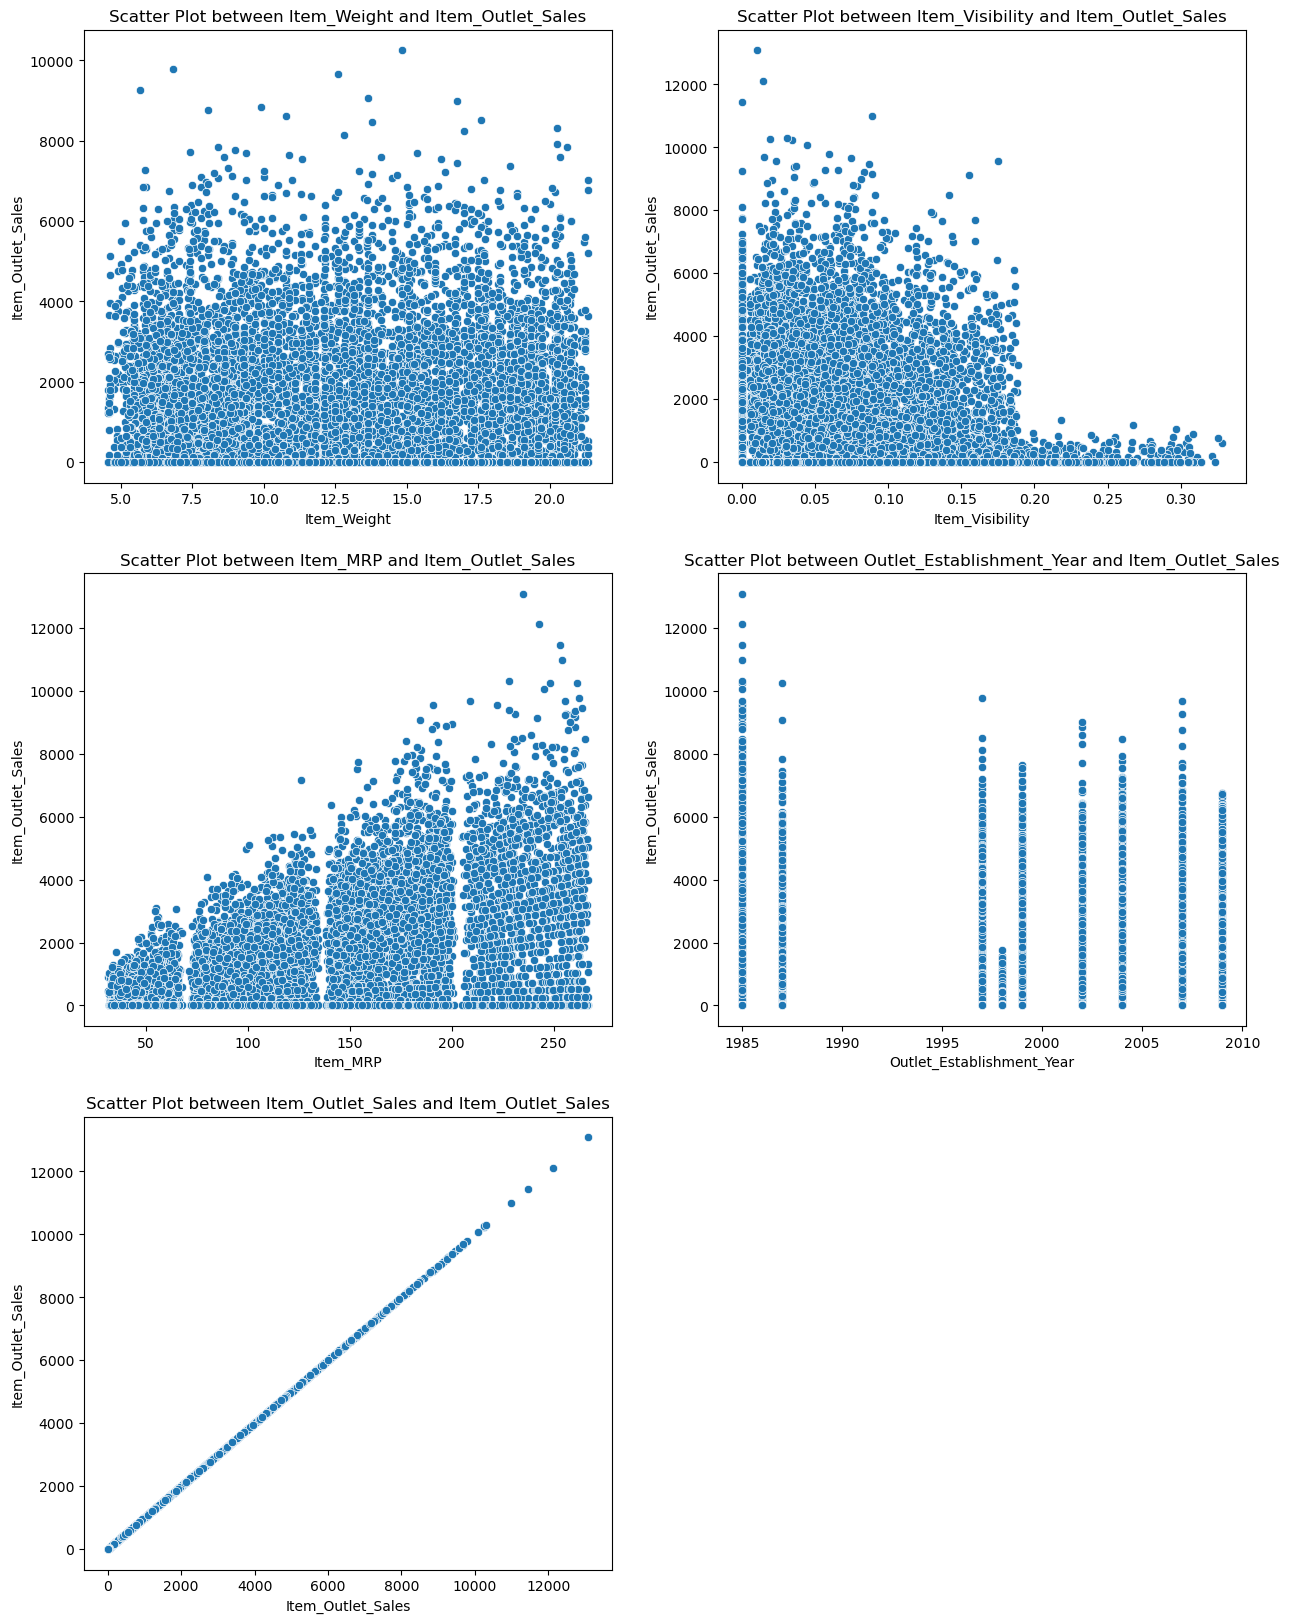

In [26]:
target_column = 'Item_Outlet_Sales'
plt.figure(figsize=(15, 20))

# Create scatter plots for each numerical column
for i, column in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=column, y=target_column, data=combined_df)
    plt.title(f'Scatter Plot between {column} and {target_column}')

plt.tight_layout    
plt.show()

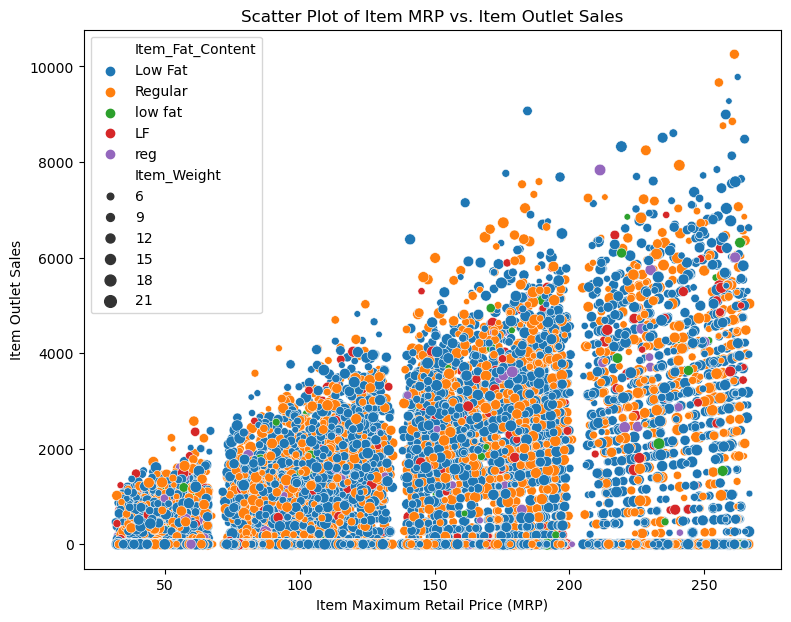

In [27]:
# Set the figure size for better visualization
fig, axes = plt.subplots(1, 1, figsize=(9, 7))

# Create a scatter plot
sns.scatterplot(
    x='Item_MRP',              
    y='Item_Outlet_Sales',     
    hue='Item_Fat_Content',    
    size='Item_Weight',        
    data=combined_df               
)

plt.title('Scatter Plot of Item MRP vs. Item Outlet Sales')

plt.xlabel('Item Maximum Retail Price (MRP)')
plt.ylabel('Item Outlet Sales')

plt.legend()
plt.show()

Quantify the strength and direction of a linear relationship between two numerical variables using correlation.

## <a id='toc2_'></a>[correlation matrix](#toc0_)

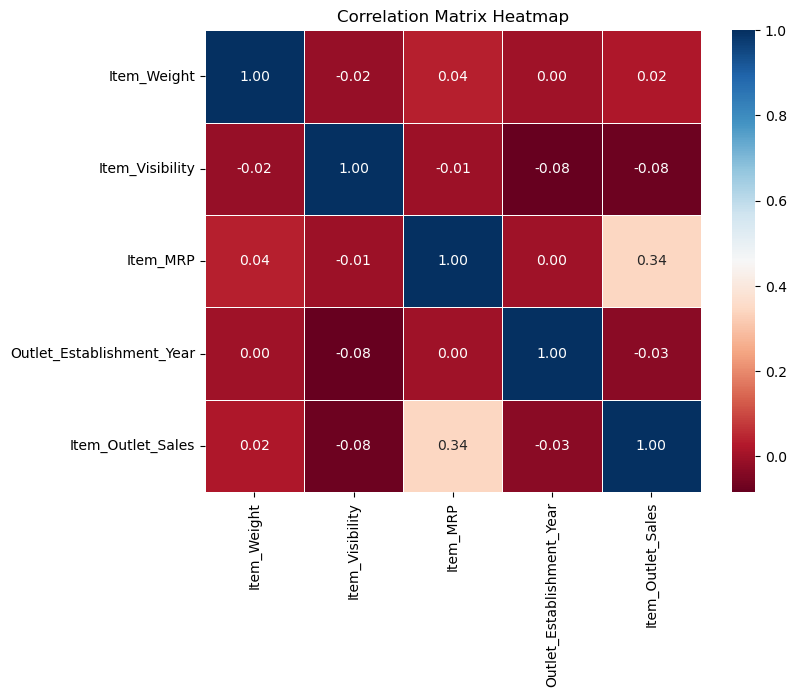

In [28]:
correlation_matrix = combined_df[num_col].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### multivariate analysis

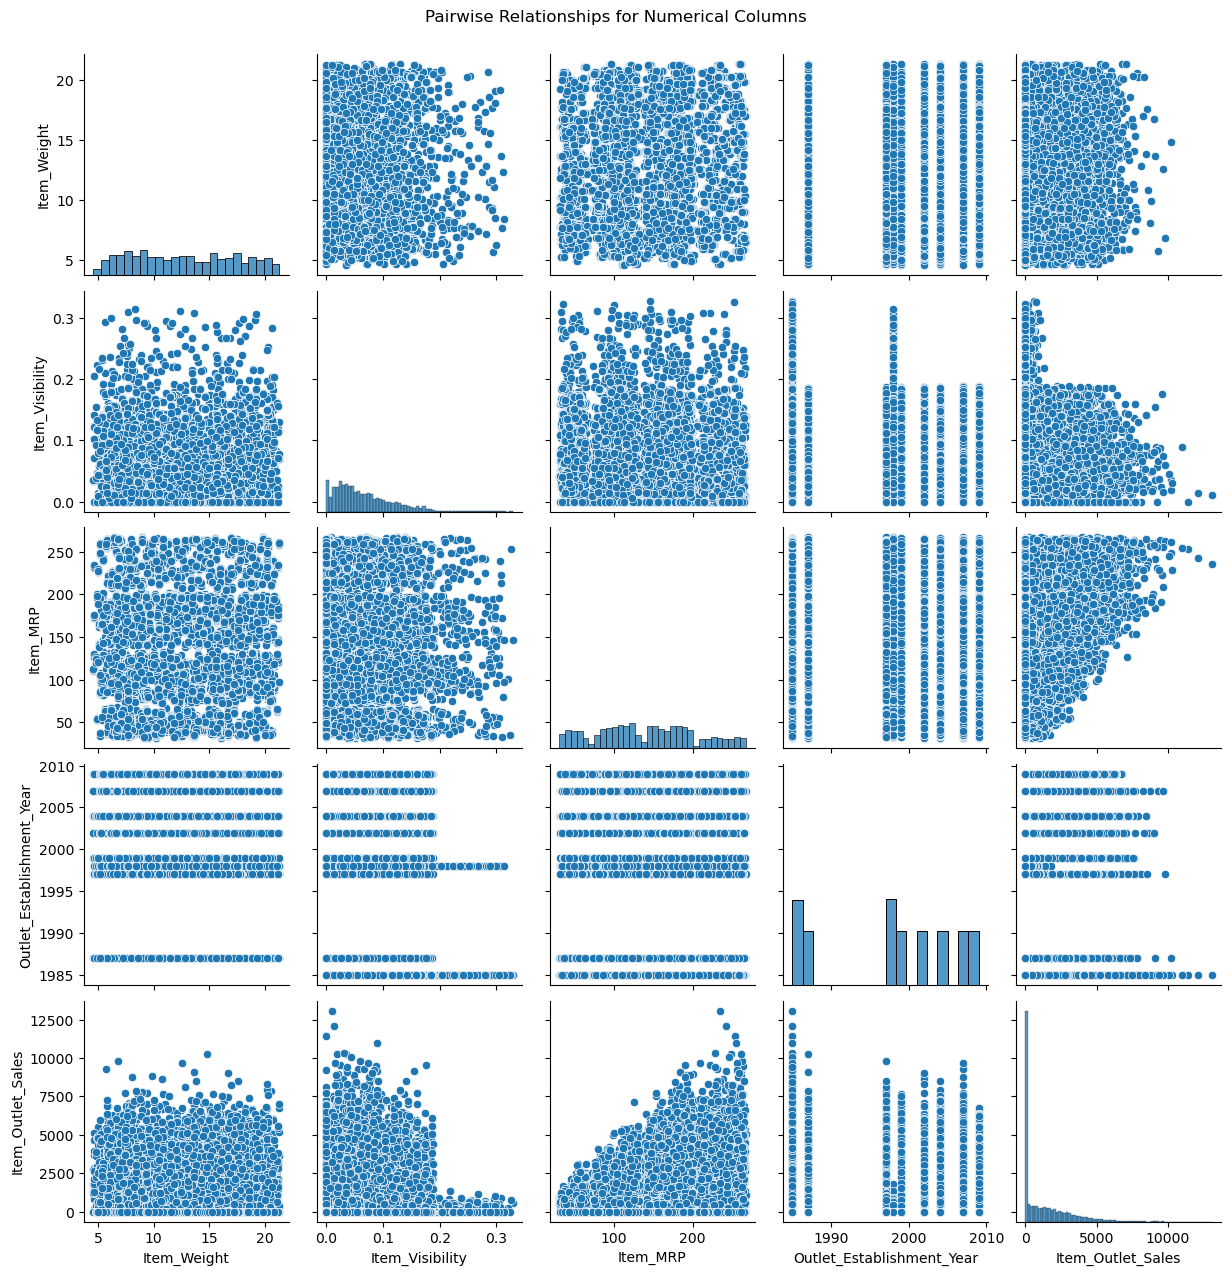

In [29]:
sns.pairplot(combined_df[num_col])
plt.suptitle('Pairwise Relationships for Numerical Columns', y=1.02)
plt.show()

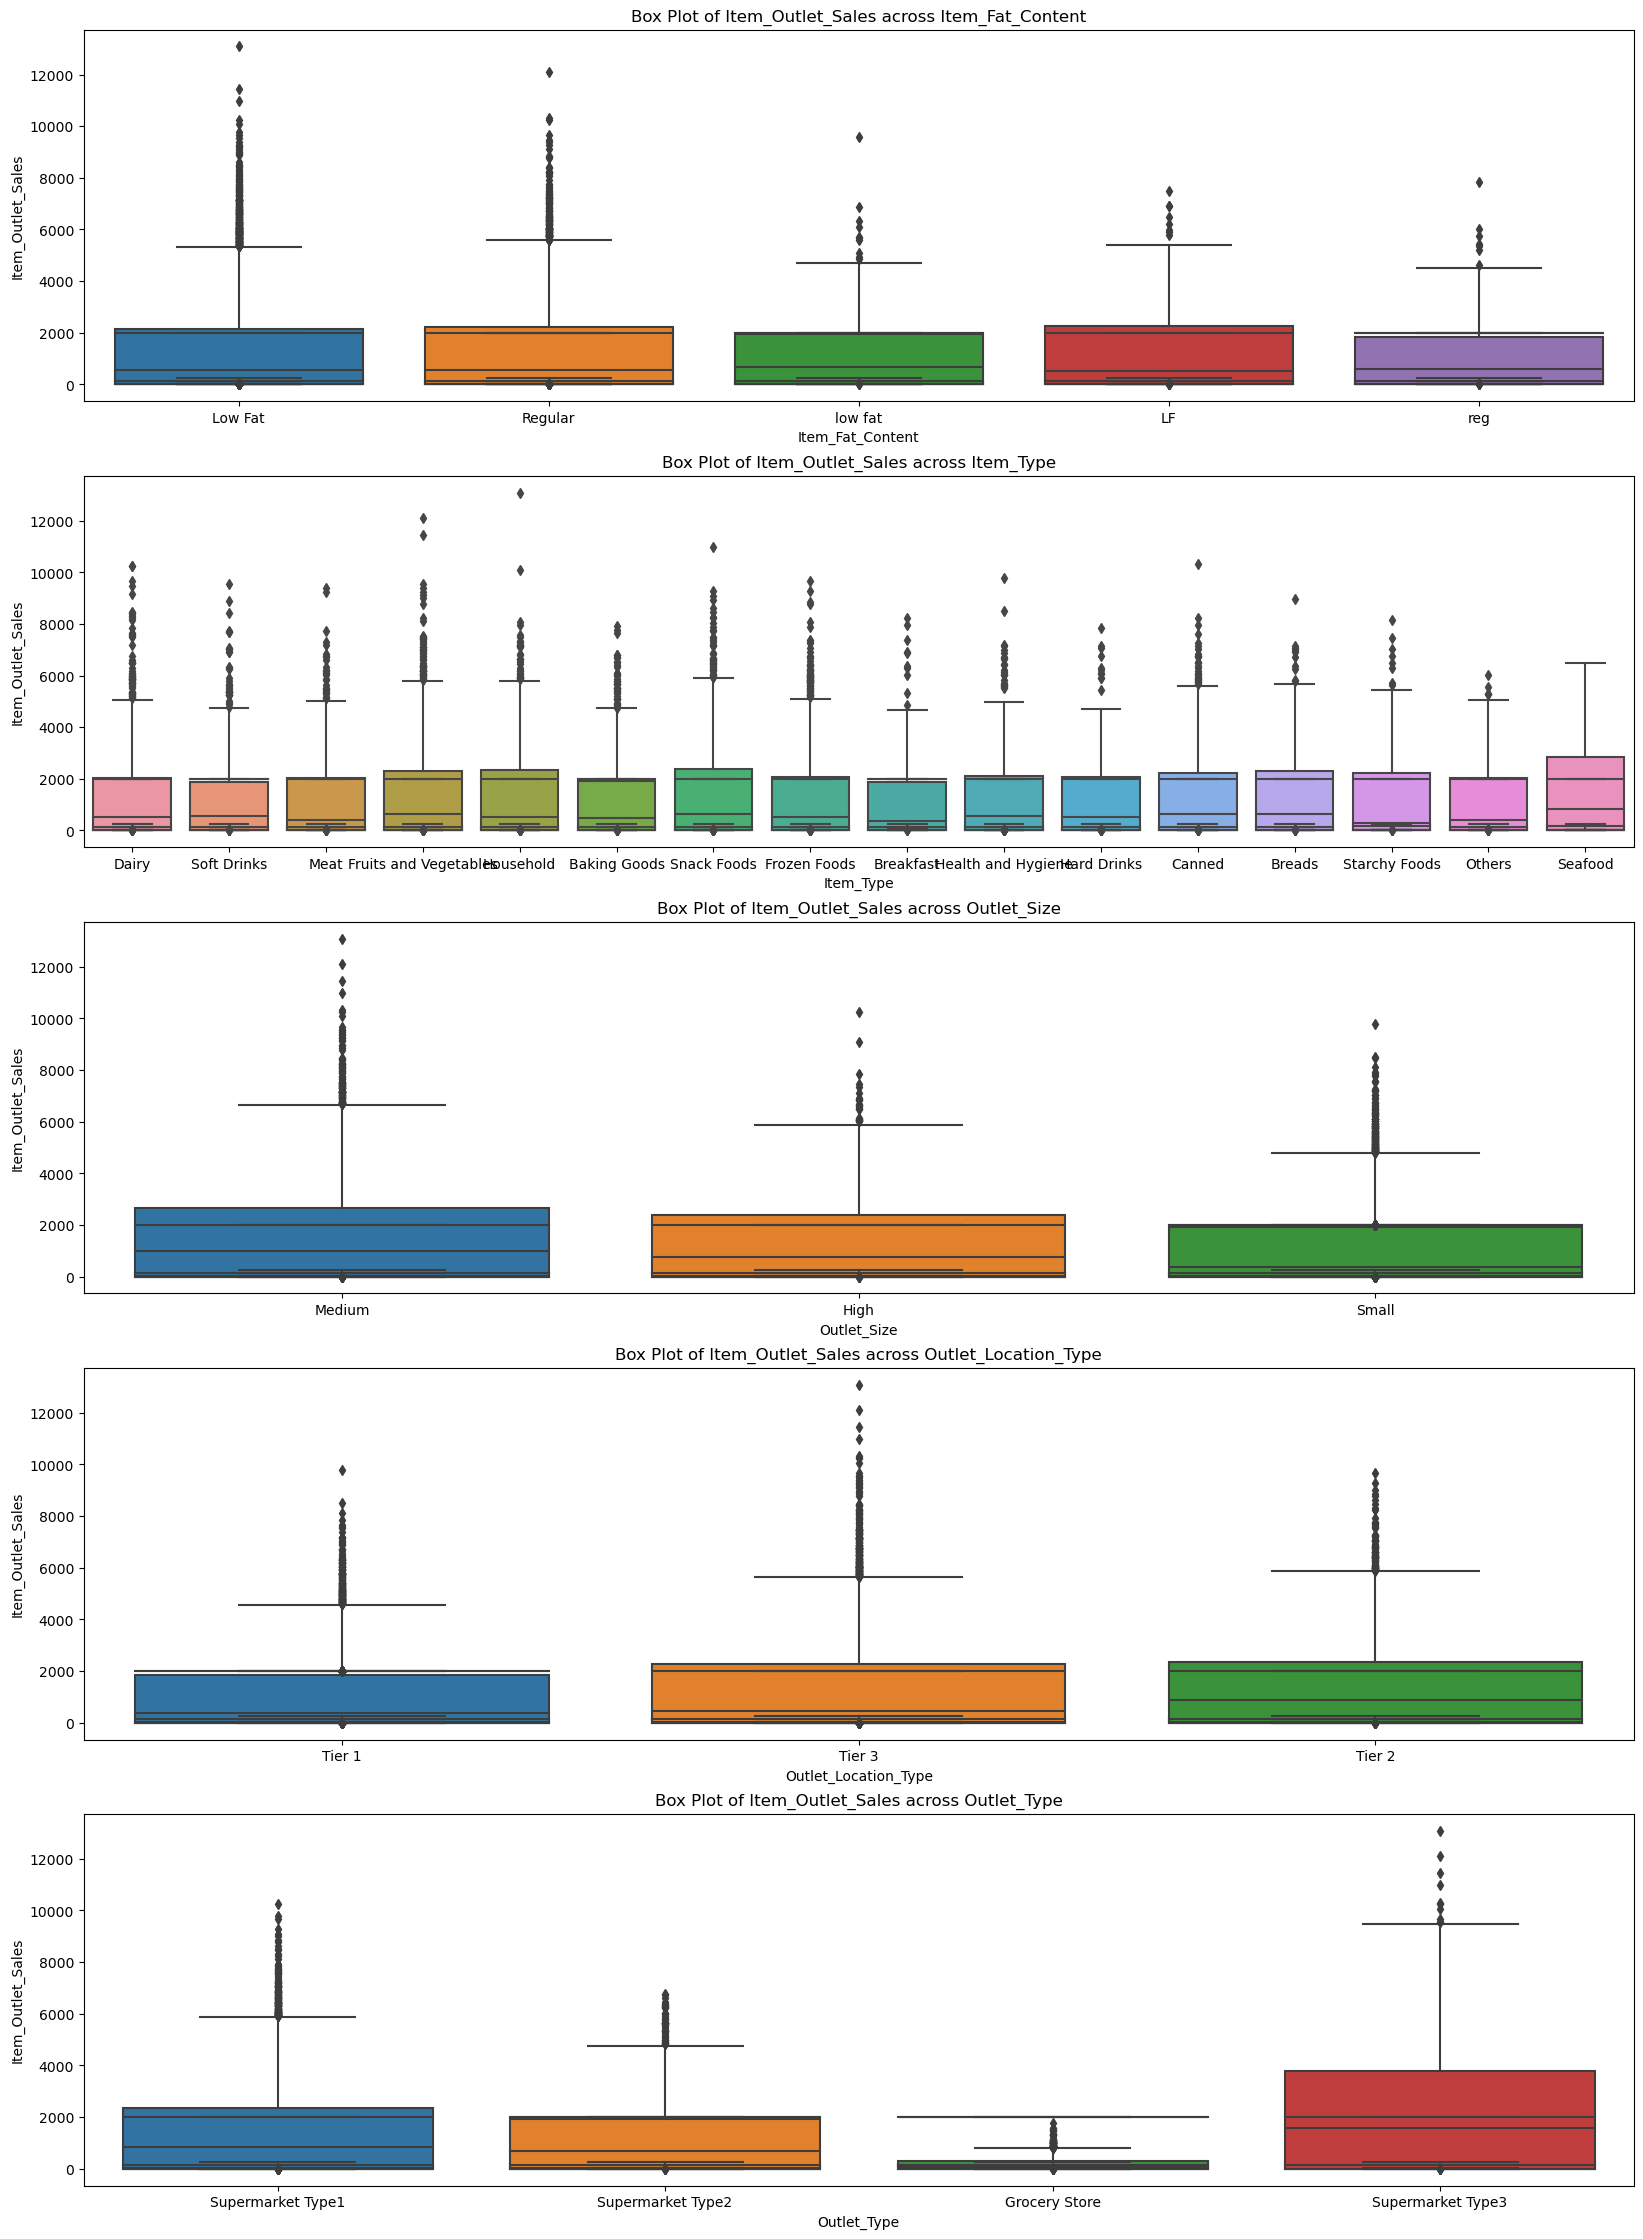

In [30]:


categorical_columns = ['Item_Fat_Content',
                       'Item_Type',
                       'Outlet_Size',
                       'Outlet_Location_Type',
                       'Outlet_Type']
numerical_columns = num_col
plt.figure(figsize=(20,28))
# Create box plots for each numerical column across each categorical column using nested loops
for i, categorical_column in enumerate(categorical_columns):
    plt.subplot(5,1,i+1)
    for numerical_column in numerical_columns:
        sns.boxplot(x=categorical_column, y=numerical_column, data=combined_df)
        plt.title(f'Box Plot of {numerical_column} across {categorical_column}')

plt.tight_layout
plt.show()

## <a id='toc2_'></a>[Data cleaning](#toc0_)

In [31]:
combined_df.shape

(14204, 13)

In [32]:
combined_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
df_train["Item_Fat_Content"].unique()  

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

**as we can see their are repeted values in the Item_Fat_Content column so we will replace that values**

In [34]:
#Replace values
combined_df["Item_Fat_Content"].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Check unique values again
print(combined_df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


## <a id='toc2_'></a>[missing value handling](#toc0_)

In [35]:
combined_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

**as we can see that their are 2439 missing values in a Item_Weight column and 4016 missing values in outlet_size column
so we can replace the null values with mean for item_weight column and mode for outlet size column**

In [36]:
combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean(), inplace=True)
combined_df['Outlet_Size'].fillna(combined_df['Outlet_Size'].mode()[0], inplace=True)

In [37]:
combined_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

### outlier detection

In [38]:
num_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

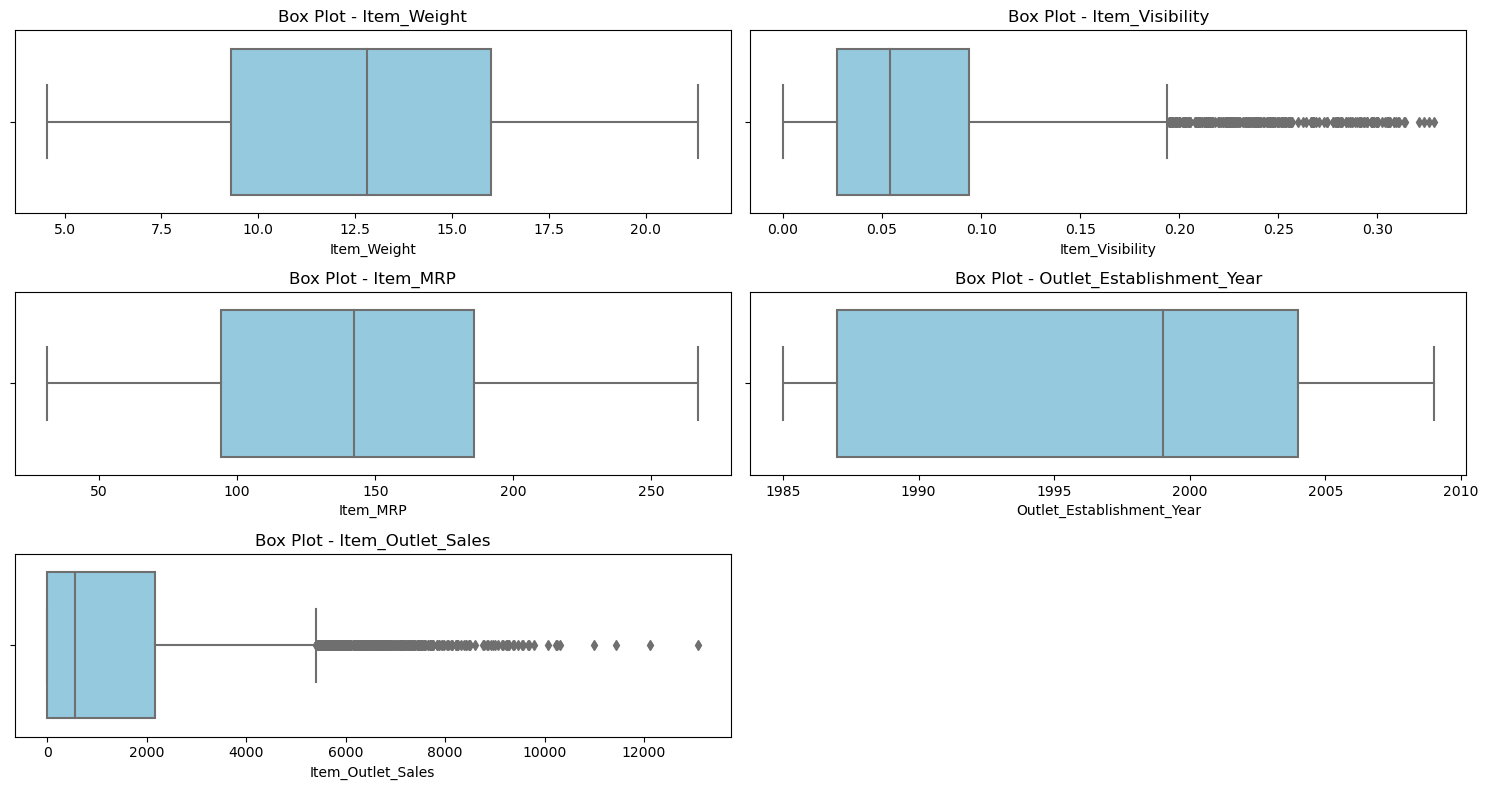

In [39]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Loop through each column and create a box plot
for i, column in enumerate(num_col):
    plt.subplot(3, 2, i+1) 
    sns.boxplot(x=combined_df[column], color='skyblue')
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

Upper limit:  0.19453961000000003
Lower limit:  -0.07346667400000001


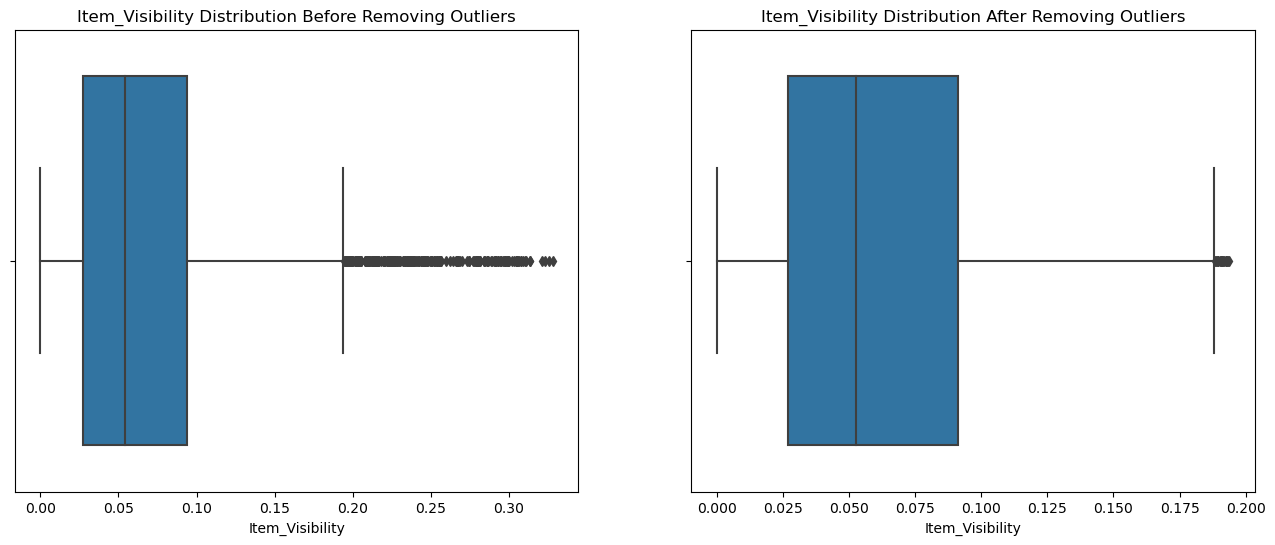

In [40]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(combined_df, "Item_Visibility")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=combined_df['Item_Visibility'], ax=ax[0])
ax[0].set_title('Item_Visibility Distribution Before Removing Outliers')

# Remove outliers using the above function
combined_df = combined_df[(combined_df['Item_Visibility'] > lower_limit) & (combined_df['Item_Visibility'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=combined_df['Item_Visibility'], ax=ax[1])
ax[1].set_title('Item_Visibility Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  6497.7086500000005
Lower limit:  -2497.2493500000005


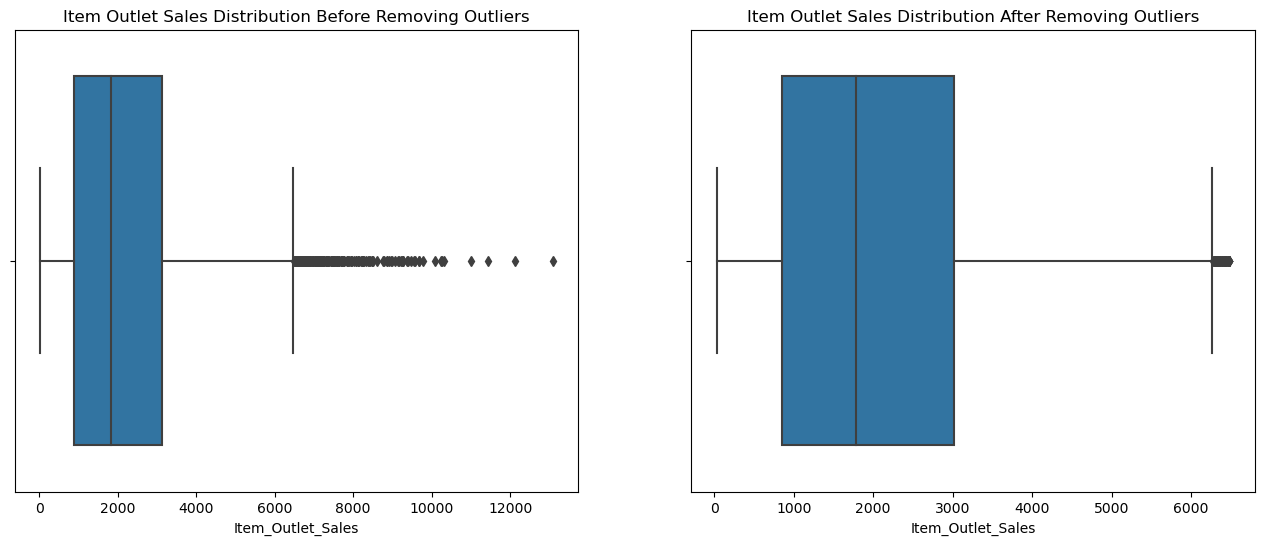

In [41]:
train_data = combined_df[combined_df['source'] == 'train']

upper_limit_sales, lower_limit_sales = detect_outliers(train_data, "Item_Outlet_Sales")
print("Upper limit: ", upper_limit_sales)
print("Lower limit: ", lower_limit_sales)

_, ax_sales = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax_sales[0])
ax_sales[0].set_title('Item Outlet Sales Distribution Before Removing Outliers')

train_data = train_data[(train_data['Item_Outlet_Sales'] > lower_limit_sales) & (train_data['Item_Outlet_Sales'] < upper_limit_sales)]

sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax_sales[1])
ax_sales[1].set_title('Item Outlet Sales Distribution After Removing Outliers')

plt.show()

### <a id='toc11_2'></a>[Encoding Categorical Data](#toc0_)

In [42]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Size']

**item_type**

In [43]:
combined_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

**In the 'Item_Type' feature, there are 16 categories. However, upon closer examination of the 'Item_Identifier,' it is observed that the first two characters signify the item type:**

**'FD' likely represents Food
'DR' likely represents Drinks
'NC' likely represents Non-Consumables
To streamline our analysis, we will drop the 'Item_Identifier' feature and create a new column that captures these item type categories.**

In [44]:
print(combined_df.shape)

(13943, 13)


In [45]:
combined_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [46]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Size']

In [47]:
combined_df['Item_categories_Type'] = combined_df['Item_Identifier'].str[0:2]

In [48]:
combined_df.drop(columns='Item_Identifier',inplace=True)

In [49]:
combined_df['Outlet_Size'] = combined_df['Outlet_Size'].map({'Small':1,'Medium':2,'High':3}).astype(int)

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

combined_df['Item_Fat_Content'] = le.fit_transform(combined_df['Item_Fat_Content'])
combined_df['Item_Type'] = le.fit_transform(combined_df['Item_Type'])
combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
combined_df['Outlet_Location_Type'] = le.fit_transform(combined_df['Outlet_Location_Type'])
combined_df['Outlet_Type'] = le.fit_transform(combined_df['Outlet_Type'])

In [52]:
# Selecting only the specified columns for train model
selected_columns = [
    'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
    'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
    'source'
]

combined_df = combined_df[selected_columns]

In [53]:
combined_df.shape

(13943, 11)

## split the data

In [54]:
train = combined_df[combined_df['source'] == 'train'].reset_index(drop=True)

test = combined_df[combined_df['source'] == 'test'].reset_index(drop=True)

train.drop(['source'], axis=1, inplace=True)
test.drop(['source', 'Item_Outlet_Sales'], axis=1, inplace=True)

In [55]:
train.shape

(8375, 10)

In [56]:
test.shape

(5568, 9)

In [57]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']


In [58]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1987,2,2,1


In [59]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)


### <a id='toc11_2'></a>[model_building](#toc0_)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [62]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [74]:
lr = LinearRegression()
RF = RandomForestRegressor()
XGB = XGBRegressor()

In [78]:
def mymodel(model):
    model.fit(X_train ,y_train)
    y_pred = model.predict(X_test)
    print(f"MAE -: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE -: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE -: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-Squared -: {r2_score(y_test, y_pred)}")
     

In [79]:
mymodel(lr)

MAE -: 947.4081955348978
MSE -: 1557231.8289220496
RMSE -: 1247.8909523360003
R-Squared -: 0.46981187755504406


## result:

**Root Mean Squared Error (RMSE):**
The RMSE, a measure of the model's prediction error, is approximately 1247.89.

**R2 Score:**
The model gives the r2_score of 0.46

In [140]:
mymodel(RF)

MAE -: 796.5283938625832
MSE -: 1281091.472792668
RMSE -: 1131.8531144952813
R-Squared -: 0.5638289238472869


## result:

**Root Mean Squared Error (RMSE):**
The RMSE, a measure of the model's prediction error, is approximately 1171.70.

**R2 Score:**
The model gives the r2_score of 0.53

In [141]:
mymodel(XGB)

MAE -: 849.1800658024323
MSE -: 1464587.6832465783
RMSE -: 1210.201505224059
R-Squared -: 0.5013542752500593


## result:

**Root Mean Squared Error (RMSE):**
The RMSE, a measure of the model's prediction error, is approximately 1210.20.

**R2 Score:**
The model gives the r2_score of 0.50

##### Random forest regressor gives the best accuracy than linear regression algorithm and XGBoost Regressor

## hyperparameter tuning

In [121]:
lr = LinearRegression(positive=False) 
RF = RandomForestRegressor(n_estimators=100,max_depth=10,n_jobs=5,min_samples_leaf=1)
XGB = XGBRegressor()

In [122]:
mymodel(lr)

MAE -: 947.4081955348978
MSE -: 1557231.8289220496
RMSE -: 1247.8909523360003
R-Squared -: 0.46981187755504406


In [123]:
mymodel(RF)

MAE -: 797.042657278618
MSE -: 1278800.6309950394
RMSE -: 1130.8406744519934
R-Squared -: 0.5646088829316989


In [124]:
mymodel(XGB)

MAE -: 849.1800658024323
MSE -: 1464587.6832465783
RMSE -: 1210.201505224059
R-Squared -: 0.5013542752500593


## cross validation

In [137]:
from sklearn.model_selection import cross_val_score
def cross_val(model):  
    result = cross_val_score(model, X, y, cv=5)
    print(result)

In [138]:
cross_val(RF)

[0.59435533 0.56280856 0.55563821 0.57803286 0.58710255]


# <a id='toc11_2'></a>[conclusion](#toc0_)

**> The predictive model indicates that the most significant features influencing sales include item visibility, item MRP (Maximum Retail Price), and outlet type**

**> The size and location of the store play crucial roles in determining sales. 
Larger outlets tend to have higher sales, especially in Tier 1 cities.**

**> Our predictive models, including linear regression, random forest, and XGBoost, achieved satisfactory performance in predicting sales, with random forest regressor outperforming the other models in terms of r2_score.**

**> Based on the analysis, we recommend BigMart to focus on optimizing product visibility, pricing strategies, and store location to maximize sales**